In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import random

# setting maximum visibility of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
case = pd.read_csv('casestudy.csv')

In [3]:
case.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
case.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
case.dtypes

customer_email     object
net_revenue       float64
year                int64
dtype: object

In [6]:
case.describe()

,net_revenue,year
count,685927.000000,685927.000000
mean,125.647755,2016.027252
std,71.854528,0.837203
min,1.000000,2015.000000
25%,63.510000,2015.000000
50%,125.730000,2016.000000
75%,187.820000,2017.000000
max,250.000000,2017.000000


In [7]:
# Q1
print('Total revenue for the current year:', 
      np.round(case.loc[case['year'] == 2017]['net_revenue'].sum(), 2))

Total revenue for the current year: 31417495.03


In [8]:
# sorting year in ascending order
case = case.sort_values(by= 'year')

In [9]:
# creating a new column for new and existing customers
case= case.assign(Occurence=np.where(~case['customer_email'].duplicated(),'New','Existing'))

In [10]:
case['Occurence'].value_counts()

New         604618
Existing     81309
Name: Occurence, dtype: int64

In [11]:
# Q2

print('New customer revenue for the year 2017:', 
      case[(case['year'] == 2017) & (case['Occurence'] == 'New')]['net_revenue'].sum())

print('New customer revenue for the year 2016:', 
      case[(case['year'] == 2016) & (case['Occurence'] == 'New')]['net_revenue'].sum())

New customer revenue for the year 2017: 28676607.64
New customer revenue for the year 2016: 18245491.009999998


In [12]:
# Q3

print('Existing customer growth for 2017:', 
      case[(case['year'] == 2017) & (case['Occurence'] == 'Existing')]['net_revenue'].sum() - case[(case['year'] == 2016) & (case['Occurence'] == 'Existing')]['net_revenue'].sum())

print('Existing customer growth for 2016:', 
      case[(case['year'] == 2016) & (case['Occurence'] == 'Existing')]['net_revenue'].sum() - case[(case['year'] == 2015) & (case['Occurence'] == 'Existing')]['net_revenue'].sum())

Existing customer growth for 2017: -4744565.1899999995
Existing customer growth for 2016: 7485452.58


In [13]:
# Q4

revenue_lost15_16 = case[case['year'] == 2015]['net_revenue'].sum() - case[(case['year'] == 2016) & (case['Occurence'] == 'Existing')]['net_revenue'].sum()
revenue_lost16_17 = case[case['year'] == 2016]['net_revenue'].sum() - case[(case['year'] == 2017) & (case['Occurence'] == 'Existing')]['net_revenue'].sum()

total_revenue_lost = revenue_lost15_16 + revenue_lost16_17

print('Total revenue lost due to attrition:', total_revenue_lost)

Total revenue lost due to attrition: 44541352.81


In [14]:
# Q5
print('Existing customer revenue of the current year:', case[(case['year'] == 2017) & 
                                                             (case['Occurence'] == 'Existing')]['net_revenue'].sum())

Existing customer revenue of the current year: 2740887.39


In [15]:
# Q6
print('Existing customer revenue of the prior year:', case[(case['year'] == 2016) & 
                                                             (case['Occurence'] == 'Existing')]['net_revenue'].sum())

Existing customer revenue of the prior year: 7485452.58


In [16]:
# Q7
print('Total customers in the current year:', case[case['year']==2017].shape[0])

Total customers in the current year: 249987


In [17]:
# Q8
print('Total customers in the prior year:', case[case['year']==2016].shape[0])

Total customers in the prior year: 204646


In [18]:
# Q9
print('New customers in the year 2016:', case[(case['year']== 2016) & (case['Occurence'] == 'New')].shape[0])
print('New customers in the year 2017:', case[(case['year']== 2017) & (case['Occurence'] == 'New')].shape[0])

New customers in the year 2016: 145062
New customers in the year 2017: 228262


In [19]:
# Q10
print('Lost customers in the year 2016:', case[case['year'] == 2015].shape[0]-case[(case['year'] == 2016) & 
                                                                                   (case['Occurence'] == 'Existing')].shape[0])
print('Lost customers in the year 2017:', case[case['year'] == 2016].shape[0]-case[(case['year'] == 2017) & 
                                                                                   (case['Occurence'] == 'Existing')].shape[0])


Lost customers in the year 2016: 171710
Lost customers in the year 2017: 182921


In [20]:
# Around 88% of the customers have made interactions just once
case.groupby('customer_email').size().value_counts()

1    529471
2     68985
3      6162
dtype: int64

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

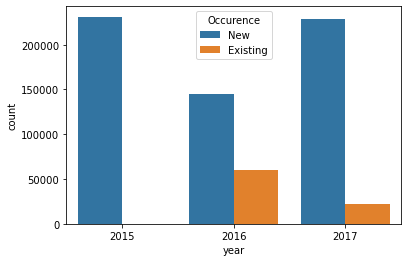

In [21]:
sns.countplot(case['year'], hue = case['Occurence'])

From the above plot we understand the following:     
From the year 2016 to 2017, the number of New customers drastically increased, where as the number of existing customers dropped. This tells us that the company lost many customers in the year 2017, but also gained new customers.   
We cannot say anything about the year 2015, as the previous year's data has not been provided.

In [22]:
df = case.groupby('customer_email').size().value_counts()
df

1    529471
2     68985
3      6162
dtype: int64

Text(0, 0.5, 'Number of customers')

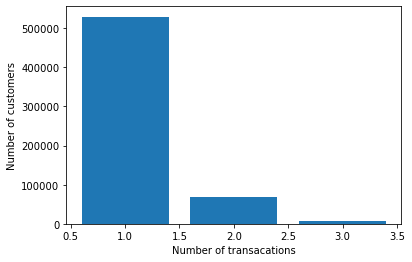

In [23]:
plt.bar([1,2,3], [df[1], df[2], df[3]])
plt.xlabel('Number of transacations')
plt.ylabel('Number of customers')

From the above plot we understand, the number of repitative transactions performed by the customers.   
Around 88% of the customers made transactions only once, this might explain the high churning rate.

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='net_revenue'>

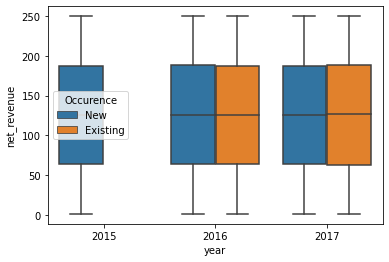

In [24]:
sns.boxplot(case['year'], case['net_revenue'], hue = case['Occurence'])

As it was seen earlier the number of new customers was comparitively very high than the existing customers.   
If you see the box-plot, it can be observed that the net revenue of both type of customers (Existing, New) is similar.   
This also tells us that the expenditure of the new customers is not as high as the existing customers, assuming as these customers are new to the company enough trust has not been built yet.